In [1]:
from rocketmodel import RocketEnv, RocketLog
from model import PPOAgent, train
import numpy as np

In [5]:

# Initialize environment and agent
env = RocketEnv(max_iters=1000)

state_dim = env.state_dim
action_dim = env.action_dim
agent = PPOAgent(state_dim, action_dim, actor_lr=0.003)
print("Agent initialized! Starting training!")

# Train the agent
train(env, agent, max_episodes=2, print_info=True)

Agent initialized! Starting training!
Episode 1, Reward: -18324.809491951513
Dir: [-2.80880271e-07  1.57787454e-13  1.00000000e+00], Throttle: 0.9999999105930328
Number of iterations: 1000, Apogee: 1738714.756728952
Episode 2, Reward: nan
Dir: [nan nan nan], Throttle: nan
Number of iterations: 1, Apogee: nan


In [3]:
def get_dir_yaw_pitch(yaw, pitch):
    # Map yaw and pitch to spherical angles
    dir = np.zeros(3)
    phi = yaw * np.pi  # Azimuthal angle (yaw)
    theta = (1 - pitch) * np.pi / 2  # Polar angle (pitch)

    # Convert to Cartesian coordinates
    dir[0] = np.cos(phi) * np.sin(theta)
    dir[1] = np.sin(phi) * np.sin(theta)
    dir[2] = np.cos(theta)

    return dir

In [4]:
state = env.reset()
done = False
total_reward = 0
rl = RocketLog(env)

while not done:
    rl.log()
    action, _ = agent.get_action(state)
    state, reward, done, = env.step(action)
    total_reward += reward

    print(f"Direction: {get_dir_yaw_pitch(action[0], action[1])}, Throttle: {(action[0]+1)/2}")

print(f"Total reward: {total_reward}")

states = rl.get_state_log()


{'x': 23.08756154665651, 'y': 0.0, 'z': 1738109.7951024119, 'vx': 4.612863429988739, 'vy': 0.0, 'vz': 3.920861001663052, 'delta_v': 3741.166385123848, 'fuel_mass': 4178.328350000319, 'throttle': 0, 'altitude': 9.795255749719217, 'perigee': 6.552846365395479, 'apogee': 1738114.5297967924, 'clock': 5.0049999999999155}


IndexError: index 1 is out of bounds for axis 0 with size 1

In [ ]:
print(states["apogee"])
print(states["clock"])

[1738100.0]
[0.0]


In [ ]:
from calc_orb_traj import plot_traj_around_planet, calculate_orbital_parameters, plot_predicted_orbit
import matplotlib.pyplot as plt

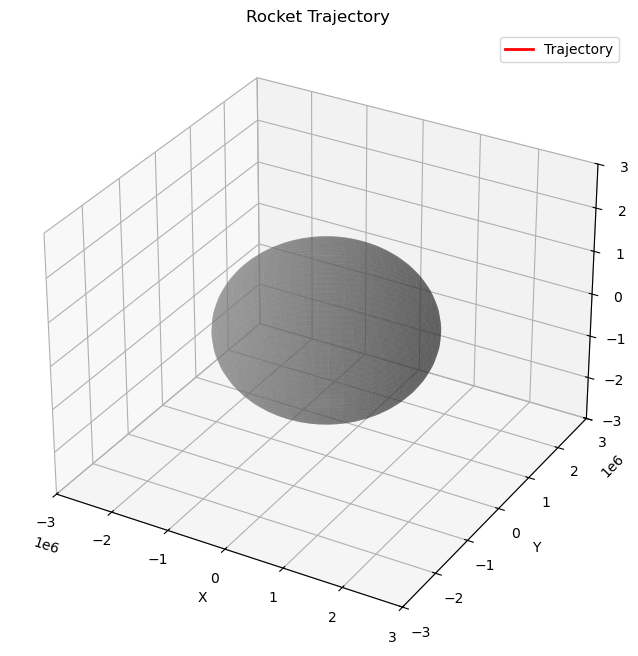

In [ ]:


plot_traj_around_planet(env.RADIUS, states["x"], states["y"], states["z"], xlims=[-3e6, 3e6], ylims=[-3e6, 3e6], zlims=[-3e6, 3e6])

plt.show()